In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter('ignore')

/home/aman/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
subdf = pd.read_csv("sample_submission.csv")

In [3]:
traindf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction,Friends
0,1,Alika,Alfie,3.876560,13.035115,Class,Waning_Gibbous,1
1,2,Pennie,Lolita,2.836218,5.811429,At Work,Waxing_Cresent,0
2,3,Crissy,Carree,3.006119,4.882863,Over a Meal,New_Moon,0
3,4,Eyde,Karleen,2.960067,9.274924,Social_Media,Waxing_Gibbous,0
4,5,Chrysa,Ludovika,7.640688,8.843167,Class,First_Quarter,1


In [4]:
testdf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction
0,1,Janaya,Nicolina,5.662542,14.863449,Social_Media,New_Moon
1,2,Nina,Rachelle,2.685942,3.002966,Class,Waxing_Cresent
2,3,Deborah,Veda,4.702476,13.453554,Social_Media,Waxing_Gibbous
3,4,Susanetta,Annalise,1.727021,3.780898,Class,First_Quarter
4,5,Janeczka,Bobbe,5.539269,10.626012,At Work,New_Moon


In [5]:
subdf.head()

,ID,Friends
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
traindf.isna().sum()

ID                               0
Person A                         0
Person B                         0
Years of Knowing                 0
Interaction Duration             0
Interaction Type                 0
Moon Phase During Interaction    0
Friends                          0
dtype: int64

In [7]:
testdf.isna().sum()

ID                               0
Person A                         0
Person B                         0
Years of Knowing                 0
Interaction Duration             0
Interaction Type                 0
Moon Phase During Interaction    0
dtype: int64

In [8]:
np.unique(np.array(traindf["Friends"]), return_counts=True)

(array([0, 1]), array([28125, 26572]))

Heat Map

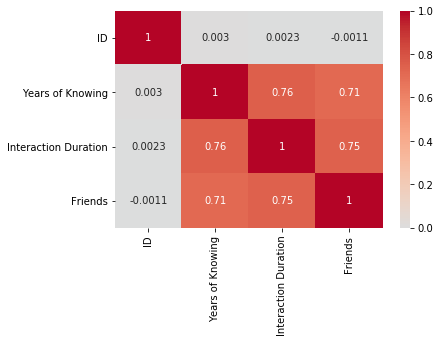

In [9]:
sns.heatmap(traindf.corr(),center=0, cmap='coolwarm', annot=True)

In [10]:
traindf["Interaction Type"].unique()

array(['Class', 'At Work', 'Over a Meal', 'Social_Media', 'Party',
       'In Passing'], dtype=object)

In [11]:
traindf["Moon Phase During Interaction"].unique()

array(['Waning_Gibbous', 'Waxing_Cresent', 'New_Moon', 'Waxing_Gibbous',
       'First_Quarter', 'Third_Quarter', 'Full_Moon', 'Waning_Cresent'],
      dtype=object)

In [12]:
def process(df):
    x = df["Years of Knowing"].values
    x = x.reshape(-1, 1)
    x = StandardScaler().fit_transform(x)
    df["Years of Knowing"] = x

    x = traindf["Interaction Duration"].values
    x = x.reshape(-1, 1)
    x = StandardScaler().fit_transform(x)
    df["Interaction Duration"] = x
    
    df1 = pd.get_dummies(df["Interaction Type"], drop_first=True)
    df2 = pd.get_dummies(df["Moon Phase During Interaction"], drop_first=True)
    df3 = pd.concat([df1, df2], axis=1)
    
    df = pd.concat([df, df3], axis=1)
    df = df.drop(["Interaction Type", "Moon Phase During Interaction"], axis=1)

    return df

In [13]:
traindf = process(traindf)
testdf = process(testdf)
traindf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Friends,Class,In Passing,Over a Meal,Party,Social_Media,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,1,Alika,Alfie,-0.229589,0.382877,1,1,0,0,0,0,0,0,0,0,1,0,0
1,2,Pennie,Lolita,-0.538188,-0.647173,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,Crissy,Carree,-0.487790,-0.779580,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,Eyde,Karleen,-0.501450,-0.153301,0,0,0,0,0,1,0,0,0,0,0,0,1
4,5,Chrysa,Ludovika,0.886972,-0.214867,1,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
x = traindf.drop(["ID", "Person A", "Person B", "Friends"], axis=1).values
y = traindf["Friends"].values

In [15]:
testX = testdf.drop(["ID", "Person A", "Person B"], axis=1).values

In [16]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(x, y)
print(svm.score(x, y))
pred = svm.predict(testX)
print(np.unique(np.array(pred), return_counts=True))
subdf["Friends"] = pred
print(subdf.groupby(["Friends"]).size())
subdf.to_csv("Submission1.csv", index=False)

(array([0, 1]), array([25592, 29105]))
Friends
0    25592
1    29105
dtype: int64


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)
print(lr.score(x, y))
pred = lr.predict(testX)
print(np.unique(np.array(pred), return_counts=True))
subdf["Friends"] = pred
print(subdf.groupby(["Friends"]).size())
subdf.to_csv("Submission2.csv", index=False)

0.9159003236009288
(array([0, 1]), array([26245, 28452]))
Friends
0    26245
1    28452
dtype: int64
